In [2]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn; seaborn.set()
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

#Reading data
data = pd.read_csv('price_data.csv', index_col="Date")
data.head()



Close    Volume    Market Cap    Oil     Gold       ETH  \
Date                                                                     
Aug 07, 2015  279.59  42484800  4.032820e+09  47.12  1080.05  2.770000   
Aug 08, 2015  261.00  58533000  4.048270e+09  47.12  1080.05  0.753325   
Aug 09, 2015  265.08  23789600  3.779770e+09  47.12  1080.05  0.701897   
Aug 10, 2015  264.47  20979400  3.843850e+09  44.96  1094.80  0.708448   
Aug 11, 2015  270.39  25433900  3.828500e+09  43.08  1113.25  1.070000   

                Ripple  Bitcoin Cash  Litecoin   NEO  Cardano   Stellar  \
Date                                                                      
Aug 07, 2015  0.008152      0.008152      4.21  4.21     4.21  0.002432   
Aug 08, 2015  0.008476      0.008476      3.85  3.85     3.85  0.002419   
Aug 09, 2015  0.008808      0.008808      3.90  3.90     3.90  0.002345   
Aug 10, 2015  0.008750      0.008750      3.95  3.95     3.95  0.002466   
Aug 11, 2015  0.008591      0.008591      4.16  4.16     4.16  0.002398   

                   EOS  DASH       NEM  ETH Classic  Lisk  
Date                                                       
Aug 07, 2015  0.002432  3.26  0.000145     0.000145   1.0  
Aug 08, 2015  0.002419  3.08  0.000136     0.000136   1.0  
Aug 09, 2015  0.002345  3.11  0.000130     0.000130   1.0  
Aug 10, 2015  0.002466  3.08  0.000135     0.000135   1.0  
Aug 11, 2015  0.002398  3.16  0.000135     0.000135   1.0

In [4]:
#Tranform the date field
data.index = pd.to_datetime(data.index)
print(data.index)
data.head(5)

DatetimeIndex(['2015-08-07', '2015-08-08', '2015-08-09', '2015-08-10',
               '2015-08-11', '2015-08-12', '2015-08-13', '2015-08-14',
               '2015-08-15', '2015-08-16',
               ...
               '2018-01-19', '2018-01-20', '2018-01-21', '2018-01-22',
               '2018-01-23', '2018-01-24', '2018-01-25', '2018-01-26',
               '2018-01-27', '2018-01-28'],
              dtype='datetime64[ns]', name='Date', length=906, freq=None)


Close    Volume    Market Cap    Oil     Gold       ETH  \
Date                                                                   
2015-08-07  279.59  42484800  4.032820e+09  47.12  1080.05  2.770000   
2015-08-08  261.00  58533000  4.048270e+09  47.12  1080.05  0.753325   
2015-08-09  265.08  23789600  3.779770e+09  47.12  1080.05  0.701897   
2015-08-10  264.47  20979400  3.843850e+09  44.96  1094.80  0.708448   
2015-08-11  270.39  25433900  3.828500e+09  43.08  1113.25  1.070000   

              Ripple  Bitcoin Cash  Litecoin   NEO  Cardano   Stellar  \
Date                                                                    
2015-08-07  0.008152      0.008152      4.21  4.21     4.21  0.002432   
2015-08-08  0.008476      0.008476      3.85  3.85     3.85  0.002419   
2015-08-09  0.008808      0.008808      3.90  3.90     3.90  0.002345   
2015-08-10  0.008750      0.008750      3.95  3.95     3.95  0.002466   
2015-08-11  0.008591      0.008591      4.16  4.16     4.16  0.002398   

                 EOS  DASH       NEM  ETH Classic  Lisk  
Date                                                     
2015-08-07  0.002432  3.26  0.000145     0.000145   1.0  
2015-08-08  0.002419  3.08  0.000136     0.000136   1.0  
2015-08-09  0.002345  3.11  0.000130     0.000130   1.0  
2015-08-10  0.002466  3.08  0.000135     0.000135   1.0  
2015-08-11  0.002398  3.16  0.000135     0.000135   1.0

Text(0,0.5,'Daily Bitcoin price')

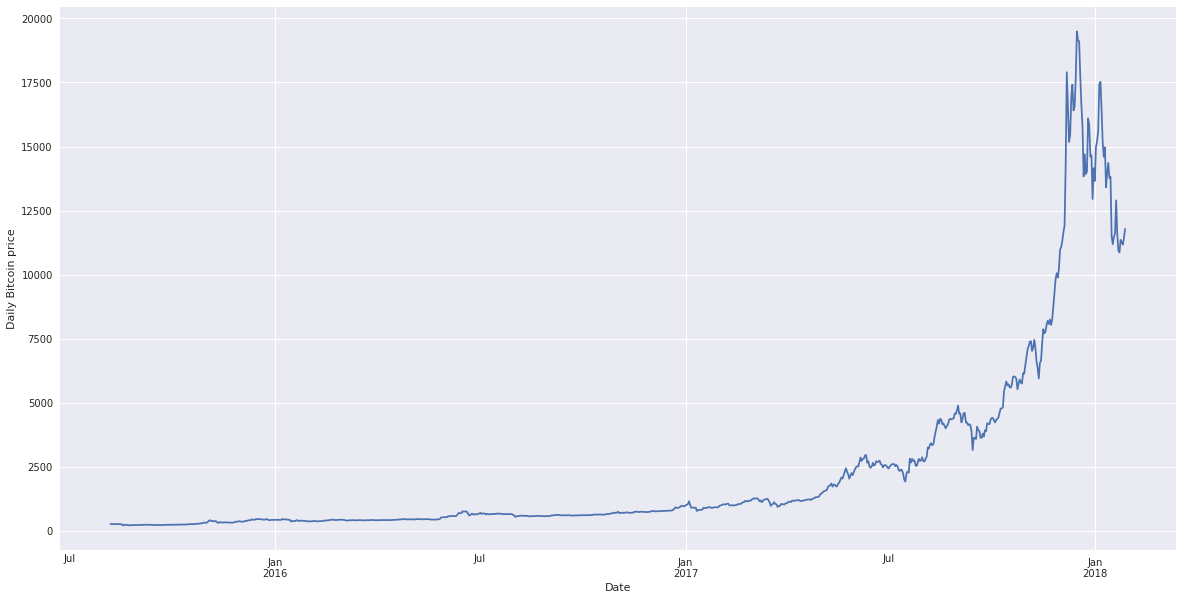

In [5]:

#Plotting the closed price
data['Close'].plot(figsize=(20,10))
plt.ylabel("Daily Bitcoin price")

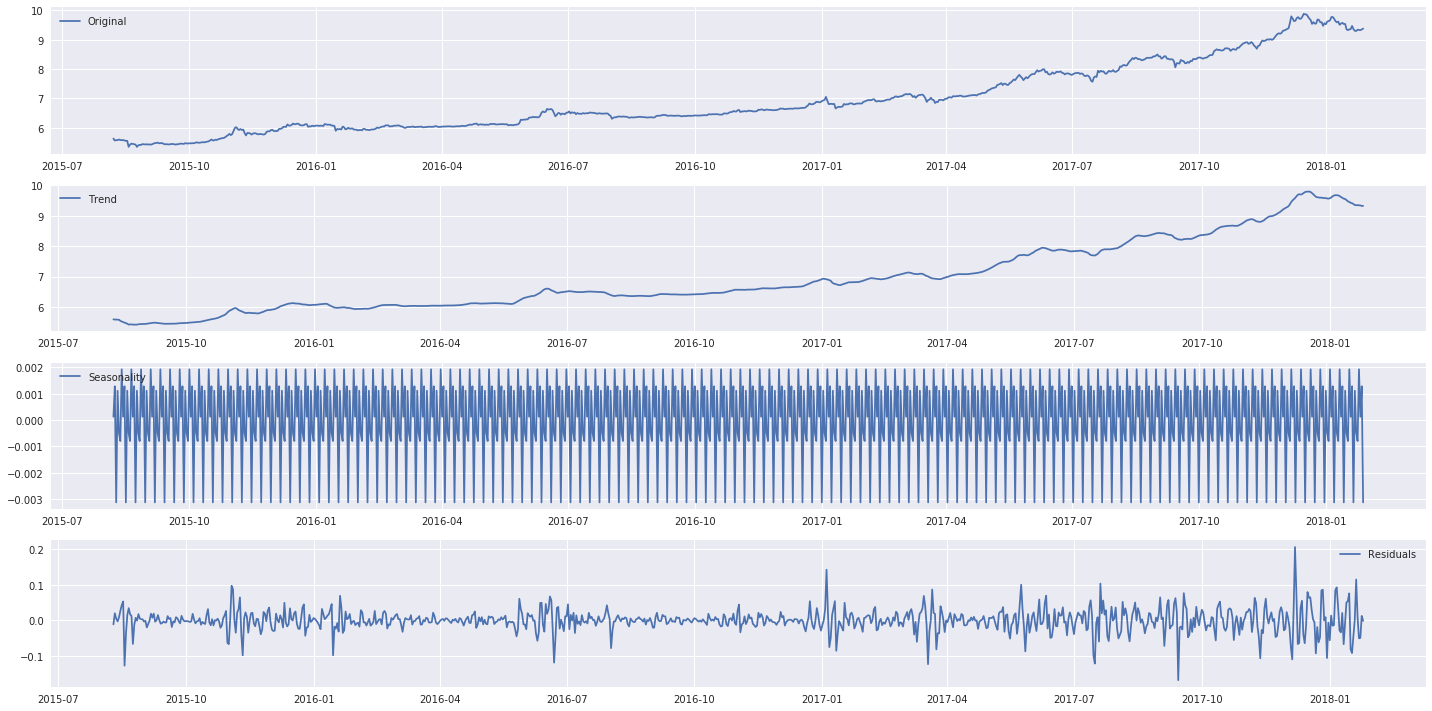

In [6]:
#Checking for seasonality
data1 = data['Close']  #Creating a dataframe with just the closed price 

#Plotting the trends (weekly, monthly, quaterly, yearly)
by_quarter = data1.groupby(data1.index.quarter)
by_quarter.plot(figsize=(20,10))

#Transform the data
ts_logtransformed = np.log(data1)
plt.plot(ts_logtransformed)

#Decomposing
decomposition = seasonal_decompose(ts_logtransformed)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(ts_logtransformed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [4]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [5]:
				#-----------------------------#
				#Using bitcoin historical data#
				#-----------------------------#

   var1(t-1)  var2(t-1)  var3(t-1)   var1(t)
1   0.003582   0.001249   0.003033  0.002618
2   0.002618   0.001923   0.003081  0.002830
3   0.002830   0.000465   0.002250  0.002798
4   0.002798   0.000347   0.002448  0.003105
5   0.003105   0.000534   0.002401  0.002897
(878, 1, 3) (878,) (27, 1, 3) (27,)
Train on 878 samples, validate on 27 samples
Epoch 1/50
 - 0s - loss: 0.0623 - val_loss: 0.5149
Epoch 2/50
 - 0s - loss: 0.0696 - val_loss: 0.4767
Epoch 3/50
 - 0s - loss: 0.0676 - val_loss: 0.4508
Epoch 4/50
 - 0s - loss: 0.0621 - val_loss: 0.4235
Epoch 5/50
 - 0s - loss: 0.0568 - val_loss: 0.3912
Epoch 6/50
 - 0s - loss: 0.0520 - val_loss: 0.3538
Epoch 7/50
 - 0s - loss: 0.0474 - val_loss: 0.3115
Epoch 8/50
 - 0s - loss: 0.0430 - val_loss: 0.2657
Epoch 9/50
 - 0s - loss: 0.0384 - val_loss: 0.2169
Epoch 10/50
 - 0s - loss: 0.0333 - val_loss: 0.1640
Epoch 11/50
 - 0s - loss: 0.0277 - val_loss: 0.1087
Epoch 12/50
 - 0s - loss: 0.0222 - val_loss: 0.0648
Epoch 13/50
 - 0s - loss: 0.0176 -

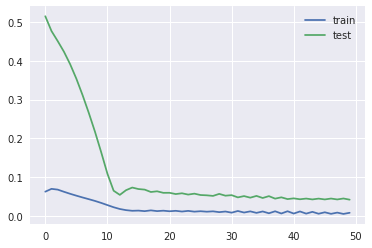

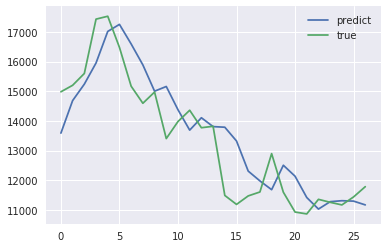

Test RMSE: 1020.892


In [6]:
#----------------------------#
#Using the last month to test#
#----------------------------#

# load dataset
dataset1 = data[['Close','Volume','Market Cap']]
values = dataset1.values
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[4,5]], axis=1, inplace=True)
print(reframed.head())

# split into train and test sets
values = reframed.values
n_train = 878
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

#Plotting the prediction
pyplot.plot(inv_yhat, label='predict')
pyplot.plot(inv_y, label='true')
pyplot.legend()
pyplot.show()

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

   var1(t-1)  var2(t-1)  var3(t-1)   var1(t)
1   0.003582   0.001249   0.003033  0.002618
2   0.002618   0.001923   0.003081  0.002830
3   0.002830   0.000465   0.002250  0.002798
4   0.002798   0.000347   0.002448  0.003105
5   0.003105   0.000534   0.002401  0.002897
(634, 1, 3) (634,) (271, 1, 3) (271,)
Train on 634 samples, validate on 271 samples
Epoch 1/50
 - 0s - loss: 0.0083 - val_loss: 0.2804
Epoch 2/50
 - 0s - loss: 0.0170 - val_loss: 0.2704
Epoch 3/50
 - 0s - loss: 0.0161 - val_loss: 0.2764
Epoch 4/50
 - 0s - loss: 0.0133 - val_loss: 0.2760
Epoch 5/50
 - 0s - loss: 0.0119 - val_loss: 0.2679
Epoch 6/50
 - 0s - loss: 0.0110 - val_loss: 0.2568
Epoch 7/50
 - 0s - loss: 0.0105 - val_loss: 0.2449
Epoch 8/50
 - 0s - loss: 0.0107 - val_loss: 0.2363
Epoch 9/50
 - 0s - loss: 0.0107 - val_loss: 0.2291
Epoch 10/50
 - 0s - loss: 0.0101 - val_loss: 0.2194
Epoch 11/50
 - 0s - loss: 0.0097 - val_loss: 0.2096
Epoch 12/50
 - 0s - loss: 0.0096 - val_loss: 0.2006
Epoch 13/50
 - 0s - loss: 0.009

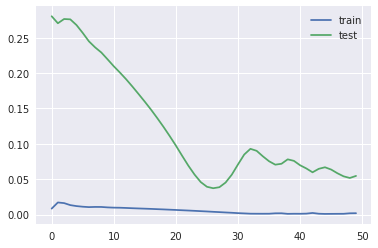

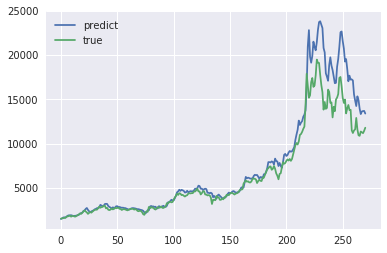

Test RMSE: 1980.355


In [7]:
#--------------#
#Train size 70%#
#--------------#

# load dataset
dataset1 = data[['Close','Volume','Market Cap']]
values = dataset1.values
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[4,5]], axis=1, inplace=True)
print(reframed.head())

# split into train and test sets
values = reframed.values
n_train= int(len(data)*0.7)
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

#Plotting the prediction
pyplot.plot(inv_yhat, label='predict')
pyplot.plot(inv_y, label='true')
pyplot.legend()
pyplot.show()

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

   var1(t-1)  var2(t-1)  var3(t-1)   var1(t)
1   0.003582   0.001249   0.003033  0.002618
2   0.002618   0.001923   0.003081  0.002830
3   0.002830   0.000465   0.002250  0.002798
4   0.002798   0.000347   0.002448  0.003105
5   0.003105   0.000534   0.002401  0.002897
(724, 1, 3) (724,) (181, 1, 3) (181,)
Train on 724 samples, validate on 181 samples
Epoch 1/50
 - 1s - loss: 0.0157 - val_loss: 0.3569
Epoch 2/50
 - 0s - loss: 0.0279 - val_loss: 0.3384
Epoch 3/50
 - 0s - loss: 0.0269 - val_loss: 0.3353
Epoch 4/50
 - 0s - loss: 0.0224 - val_loss: 0.3301
Epoch 5/50
 - 0s - loss: 0.0191 - val_loss: 0.3153
Epoch 6/50
 - 0s - loss: 0.0177 - val_loss: 0.2964
Epoch 7/50
 - 0s - loss: 0.0175 - val_loss: 0.2796
Epoch 8/50
 - 0s - loss: 0.0165 - val_loss: 0.2621
Epoch 9/50
 - 0s - loss: 0.0155 - val_loss: 0.2425
Epoch 10/50
 - 0s - loss: 0.0147 - val_loss: 0.2220
Epoch 11/50
 - 0s - loss: 0.0137 - val_loss: 0.2006
Epoch 12/50
 - 0s - loss: 0.0127 - val_loss: 0.1774
Epoch 13/50
 - 0s - loss: 0.011

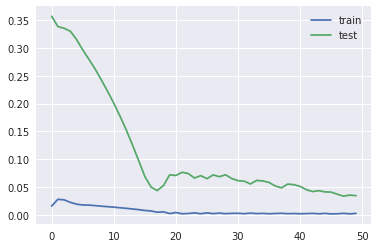

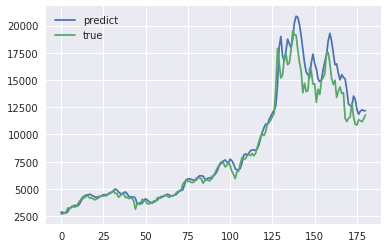

Test RMSE: 1122.050


In [8]:
#--------------#
#Train size 80%#
#--------------#

# load dataset
dataset1 = data[['Close','Volume','Market Cap']]
values = dataset1.values
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[4,5]], axis=1, inplace=True)
print(reframed.head())

# split into train and test sets
values = reframed.values
n_train= int(len(data)*0.8)
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

#Plotting the prediction
pyplot.plot(inv_yhat, label='predict')
pyplot.plot(inv_y, label='true')
pyplot.legend()
pyplot.show()

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


   var1(t-1)  var2(t-1)  var3(t-1)   var1(t)
1   0.003582   0.001249   0.003033  0.002618
2   0.002618   0.001923   0.003081  0.002830
3   0.002830   0.000465   0.002250  0.002798
4   0.002798   0.000347   0.002448  0.003105
5   0.003105   0.000534   0.002401  0.002897
(453, 1, 3) (453,) (452, 1, 3) (452,)
Train on 453 samples, validate on 452 samples
Epoch 1/50
 - 1s - loss: 0.0056 - val_loss: 0.1962
Epoch 2/50
 - 0s - loss: 0.0111 - val_loss: 0.1913
Epoch 3/50
 - 0s - loss: 0.0106 - val_loss: 0.1990
Epoch 4/50
 - 0s - loss: 0.0080 - val_loss: 0.2024
Epoch 5/50
 - 0s - loss: 0.0068 - val_loss: 0.1978
Epoch 6/50
 - 0s - loss: 0.0061 - val_loss: 0.1919
Epoch 7/50
 - 0s - loss: 0.0068 - val_loss: 0.1889
Epoch 8/50
 - 0s - loss: 0.0067 - val_loss: 0.1871
Epoch 9/50
 - 0s - loss: 0.0063 - val_loss: 0.1839
Epoch 10/50
 - 0s - loss: 0.0060 - val_loss: 0.1796
Epoch 11/50
 - 0s - loss: 0.0061 - val_loss: 0.1761
Epoch 12/50
 - 0s - loss: 0.0061 - val_loss: 0.1730
Epoch 13/50
 - 0s - loss: 0.005

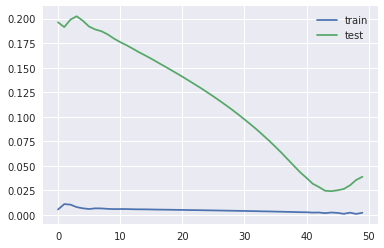

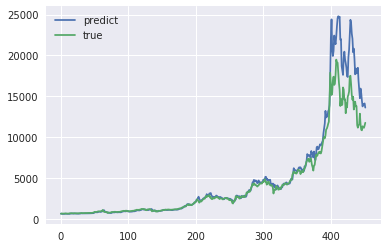

Test RMSE: 1847.875


In [9]:
#--------------#
#Train size 50%#
#--------------#

# load dataset
dataset1 = data[['Close','Volume','Market Cap']]
values = dataset1.values
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[4,5]], axis=1, inplace=True)
print(reframed.head())

# split into train and test sets
values = reframed.values
n_train= int(len(data)*0.5)
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

#Plotting the prediction
pyplot.plot(inv_yhat, label='predict')
pyplot.plot(inv_y, label='true')
pyplot.legend()
pyplot.show()

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [11]:
                #---------------------#
				#Using additional data#
				#---------------------#

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.003582   0.001249   0.003033   0.523666   0.081311   0.001673   
2   0.002618   0.001923   0.003081   0.523666   0.081311   0.000228   
3   0.002830   0.000465   0.002250   0.523666   0.081311   0.000191   
4   0.002798   0.000347   0.002448   0.469572   0.129672   0.000196   
5   0.003105   0.000534   0.002401   0.422489   0.190164   0.000455   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var12(t-1)  \
1   0.001203   0.000001   0.004442    0.022046    0.088294    0.001104   
2   0.001299   0.000001   0.003430    0.020124    0.080711    0.001090   
3   0.001398   0.000001   0.003570    0.020391    0.081764    0.001007   
4   0.001380   0.000001   0.003711    0.020658    0.082817    0.001142   
5   0.001333   0.000001   0.004301    0.021779    0.087241    0.001066   

   var13(t-1)  var14(t-1)  var15(t-1)    var16(t-1)  var17(t-1)   var1(t)  
1    0.000061    0.000775    0.000032  1.339390e-06 

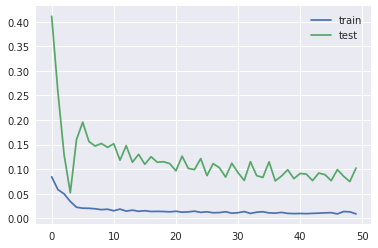

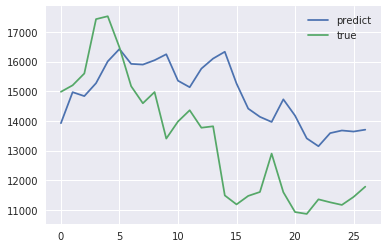

Test RMSE: 2263.412


In [12]:
#----------------------------#
#Using the last month to test#
#----------------------------#

# load dataset
values = data.values
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]], axis=1, inplace=True)
print(reframed.head())

# split into train and test sets
values = reframed.values
n_train= 878
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

#Plotting the prediction
pyplot.plot(inv_yhat, label='predict')
pyplot.plot(inv_y, label='true')
pyplot.legend()
pyplot.show()

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.003582   0.001249   0.003033   0.523666   0.081311   0.001673   
2   0.002618   0.001923   0.003081   0.523666   0.081311   0.000228   
3   0.002830   0.000465   0.002250   0.523666   0.081311   0.000191   
4   0.002798   0.000347   0.002448   0.469572   0.129672   0.000196   
5   0.003105   0.000534   0.002401   0.422489   0.190164   0.000455   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var12(t-1)  \
1   0.001203   0.000001   0.004442    0.022046    0.088294    0.001104   
2   0.001299   0.000001   0.003430    0.020124    0.080711    0.001090   
3   0.001398   0.000001   0.003570    0.020391    0.081764    0.001007   
4   0.001380   0.000001   0.003711    0.020658    0.082817    0.001142   
5   0.001333   0.000001   0.004301    0.021779    0.087241    0.001066   

   var13(t-1)  var14(t-1)  var15(t-1)    var16(t-1)  var17(t-1)   var1(t)  
1    0.000061    0.000775    0.000032  1.339390e-06 

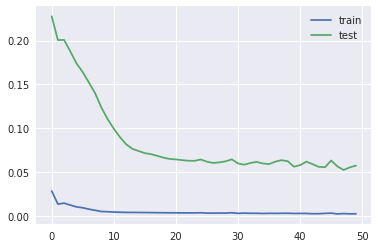

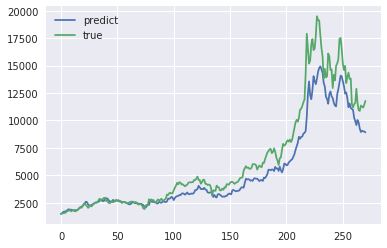

Test RMSE: 1626.957


In [13]:
#--------------#
#Train size 70%#
#--------------#

# load dataset
values = data.values
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]], axis=1, inplace=True)
print(reframed.head())

# split into train and test sets
values = reframed.values
n_train= int(len(data)*0.7)
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

#Plotting the prediction
pyplot.plot(inv_yhat, label='predict')
pyplot.plot(inv_y, label='true')
pyplot.legend()
pyplot.show()

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.003582   0.001249   0.003033   0.523666   0.081311   0.001673   
2   0.002618   0.001923   0.003081   0.523666   0.081311   0.000228   
3   0.002830   0.000465   0.002250   0.523666   0.081311   0.000191   
4   0.002798   0.000347   0.002448   0.469572   0.129672   0.000196   
5   0.003105   0.000534   0.002401   0.422489   0.190164   0.000455   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var12(t-1)  \
1   0.001203   0.000001   0.004442    0.022046    0.088294    0.001104   
2   0.001299   0.000001   0.003430    0.020124    0.080711    0.001090   
3   0.001398   0.000001   0.003570    0.020391    0.081764    0.001007   
4   0.001380   0.000001   0.003711    0.020658    0.082817    0.001142   
5   0.001333   0.000001   0.004301    0.021779    0.087241    0.001066   

   var13(t-1)  var14(t-1)  var15(t-1)    var16(t-1)  var17(t-1)   var1(t)  
1    0.000061    0.000775    0.000032  1.339390e-06 

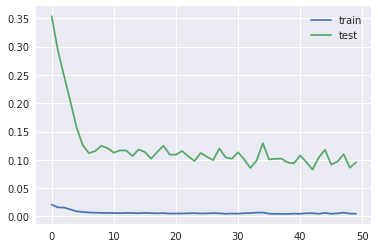

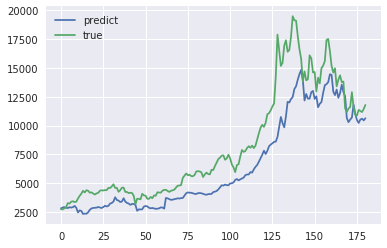

Test RMSE: 2332.766


In [14]:
#--------------#
#Train size 80%#
#--------------#

# load dataset
values = data.values
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]], axis=1, inplace=True)
print(reframed.head())

# split into train and test sets
values = reframed.values
n_train= int(len(data)*0.8)
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

#Plotting the prediction
pyplot.plot(inv_yhat, label='predict')
pyplot.plot(inv_y, label='true')
pyplot.legend()
pyplot.show()

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.003582   0.001249   0.003033   0.523666   0.081311   0.001673   
2   0.002618   0.001923   0.003081   0.523666   0.081311   0.000228   
3   0.002830   0.000465   0.002250   0.523666   0.081311   0.000191   
4   0.002798   0.000347   0.002448   0.469572   0.129672   0.000196   
5   0.003105   0.000534   0.002401   0.422489   0.190164   0.000455   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var12(t-1)  \
1   0.001203   0.000001   0.004442    0.022046    0.088294    0.001104   
2   0.001299   0.000001   0.003430    0.020124    0.080711    0.001090   
3   0.001398   0.000001   0.003570    0.020391    0.081764    0.001007   
4   0.001380   0.000001   0.003711    0.020658    0.082817    0.001142   
5   0.001333   0.000001   0.004301    0.021779    0.087241    0.001066   

   var13(t-1)  var14(t-1)  var15(t-1)    var16(t-1)  var17(t-1)   var1(t)  
1    0.000061    0.000775    0.000032  1.339390e-06 

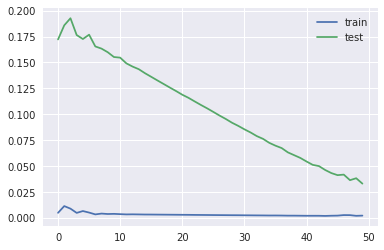

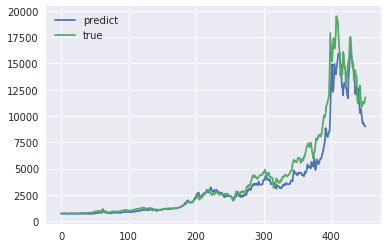

Test RMSE: 1156.968


In [15]:
#--------------#
#Train size 50%#
#--------------#

# load dataset
values = data.values
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]], axis=1, inplace=True)
print(reframed.head())

# split into train and test sets
values = reframed.values
n_train= int(len(data)*0.5)
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

#Plotting the prediction
pyplot.plot(inv_yhat, label='predict')
pyplot.plot(inv_y, label='true')
pyplot.legend()
pyplot.show()

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)